# Assignment - Boosting with XGBoost

<b>(1)</b> Using the XGBoost algorithm by reusing the data set you used in your second project, create regression and classification models and determine the most appropriate parameter values for this model. Compare with the models in your projects.

## 1.1. Classification with XGBOOST

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.tree as tree
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

df_heart_attack = pd.read_csv('risk_of_heart_attack2.csv')
df_heart_attack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [2]:
import xgboost as xgb

X = df_heart_attack.drop('num', axis=1)
y = df_heart_attack['num']

heart_attack_dmatrix = xgb.DMatrix(data=X, label=y)

params = {'objective': 'reg:logistic', 'max_depth':3}

heart_attack_cv = xgb.cv(dtrain=heart_attack_dmatrix, params=params, nfold=3,
                        num_boost_round=5, metrics="error", as_pandas=True, seed=11)
display(heart_attack_cv)

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.033898,0.006919,0.079096,0.007990
1,0.028249,0.003995,0.084746,0.013839
2,0.031073,0.003995,0.079096,0.021140
3,0.028248,0.007990,0.067797,0.036614
4,0.016949,0.011985,0.084746,0.023970


In [3]:
print('Accuracy Value: {:.3f}'.format((1-heart_attack_cv["test-error-mean"]).max()))

Accuracy Value: 0.932


In [4]:
heart_attack_auc = xgb.cv(dtrain=heart_attack_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="auc", as_pandas=True, seed=11)
display(heart_attack_auc)
print('AUC Score : {:.3f}'.format(heart_attack_auc["test-auc-mean"].max()))

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.972394,0.026640,0.765822,0.138294
1,0.973506,0.023186,0.772186,0.148622
2,0.987455,0.004067,0.783080,0.150288
3,0.987986,0.001331,0.781807,0.155777
4,0.993372,0.003245,0.826993,0.161723


AUC Score : 0.827


## 1.2. Regression with XGBOOST

In [5]:
df_house_prices = pd.read_csv('house_prices2.csv')
df_house_prices.head()

,SalePrice,BsmtQual,PoolQC,YearBuilt,OverallQual,GrLivArea,GarageCars
0,208500,3,0,2003,7,1710,2
1,181500,3,0,1976,6,1262,2
2,223500,3,0,2001,7,1786,2
3,140000,2,0,1915,7,1717,3
4,250000,3,0,2000,8,2198,3


In [6]:
from sklearn.metrics import mean_squared_error as mse

X = df_house_prices.drop('SalePrice', axis=1)
y = df_house_prices['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=111)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
rmse = mse(y_test, y_pred)**(1/2)
print("RMSE: {:.4f}".format(rmse))

RMSE: 45115.1627


<b>(2)</b> List the key difference between Gradient Boosting and XGBoost

* Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting. In fact, XGBoost is also known as a ‘regularized boosting‘ technique.
* XGBoost implements parallel processing and is faster as compared to GBM.
* A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm. XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
* XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run. This is unlike GBM where we have to run a grid-search and only a limited values can be tested.

<b>(3)</b> Assume that after running XGBoost, you use get_score, how do you interpret the result based on importance_type?

With get_score we get feature importance of each feature. Importance type can be defined as:

* <b>'weight'</b>: the number of times a feature is used to split the data across all trees.
* <b>'gain'</b>: the average gain across all splits the feature is used in. A higher value of this metric when compared to another feature implies it is more important for generating a prediction.
* <b>'cover'</b>: the average coverage across all splits the feature is used in.
* <b>'total_gain'</b>: the total gain across all splits the feature is used in.
* <b>'total_cover'</b>: the total coverage across all splits the feature is used in.

{'OverallQual': 343,
 'GrLivArea': 1543,
 'YearBuilt': 972,
 'GarageCars': 132,
 'BsmtQual': 280,
 'PoolQC': 40}

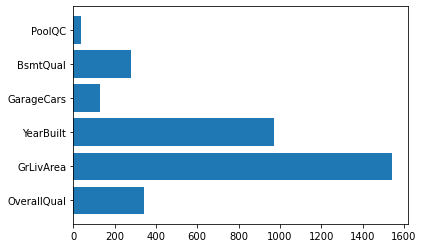

In [7]:
weight = xg_reg.get_booster().get_score(importance_type="weight")
plt.barh(list(weight.keys()), list(weight.values()));
display(weight)

{'OverallQual': 21343108605.626095,
 'GrLivArea': 1680021416.2681465,
 'YearBuilt': 739321153.6425751,
 'GarageCars': 7023419290.869318,
 'BsmtQual': 2421086389.526207,
 'PoolQC': 423916743.955475}

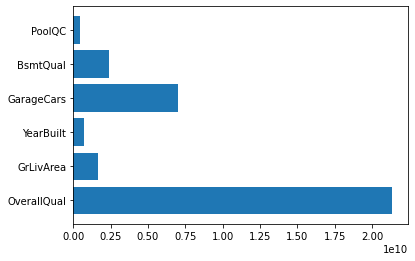

In [8]:
gain = xg_reg.get_booster().get_score(importance_type="gain")
plt.barh(list(gain.keys()), list(gain.values()));
display(gain)

{'OverallQual': 127.8396501457726,
 'GrLivArea': 281.9831497083603,
 'YearBuilt': 152.92078189300412,
 'GarageCars': 176.27272727272728,
 'BsmtQual': 99.825,
 'PoolQC': 385.3}

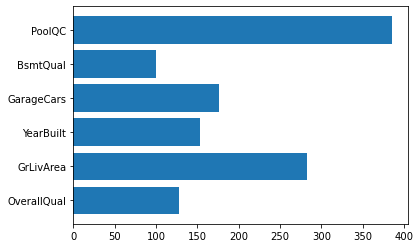

In [9]:
cover = xg_reg.get_booster().get_score(importance_type="cover")
plt.barh(list(cover.keys()), list(cover.values()));
display(cover)

The variable PoolQC has much smaller number of possible values (mostly 0) compared to other features in the data. So, PoolQC can be used at most once in each tree. Whereas features such as GrLivArea might appear much more often on different levels of the trees.

As we can see from the results above the PoolQC feature got a very low importance based on the weight and gain metrics, but a very high importance based on cover metric.